<a href="https://colab.research.google.com/github/sarkar2527/DSAP/blob/main/Heart_Disease_Prediction_FS_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [3]:
# Loading the dataset
df = pd.read_csv('/content/drive/MyDrive/ Heart Disease Prediction/heart.csv')

# **Exploring the dataset**

In [4]:
# Returns number of rows and columns of the dataset
df.shape

(303, 14)

In [5]:
# Returns an object with all of the column headers
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [6]:
# Returns different datatypes for each columns (float, int, string, bool, etc.)
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [7]:
#checking Null Values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Returns basic information on all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
# Returns basic statistics on numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**Checking the outliers through box plot**

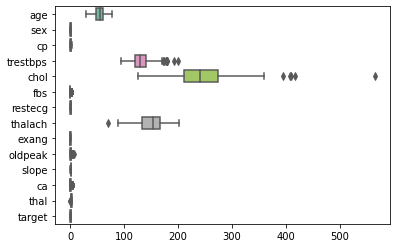

In [10]:
import seaborn as sns
ax = sns.boxplot(data=df, orient="h", palette="Set2")

**Removing the outlier**

In [11]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'] # one or more

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df_new = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [12]:
df_new.shape

(228, 14)

In [13]:
# Returns the first x number of rows when head(x). Without a number it returns 5
df_new.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1


# **Data Visualization**

In [14]:
# Importing essential libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


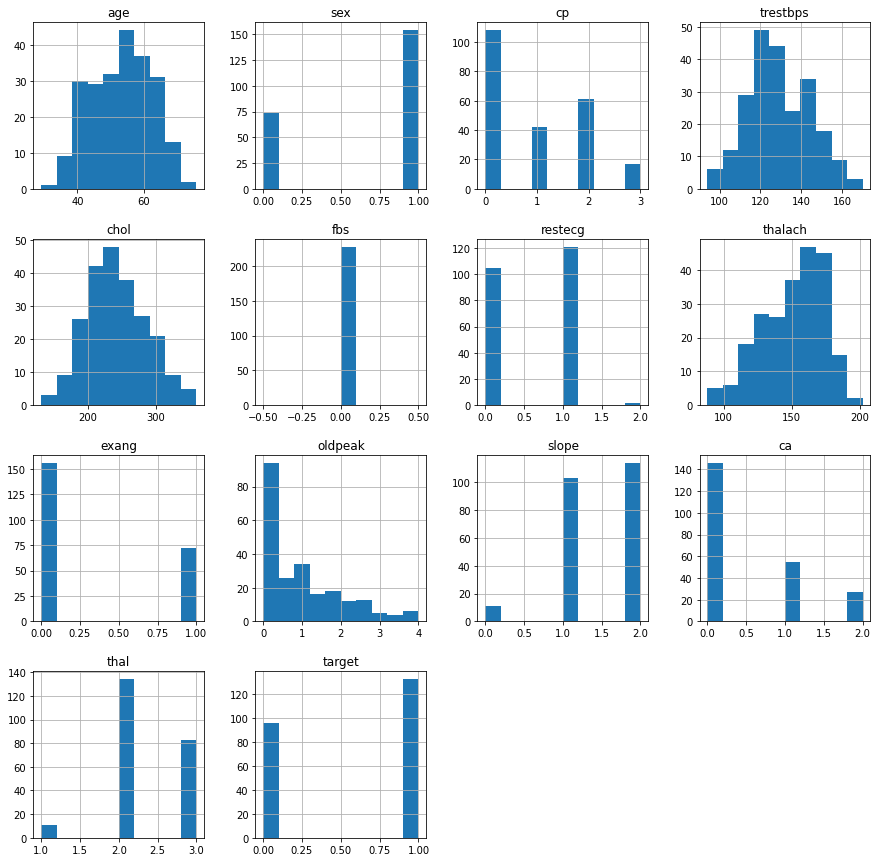

In [15]:
# Plotting histogram for the entire dataset
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = df_new.hist(ax=ax)

Text(0, 0.5, 'Count')

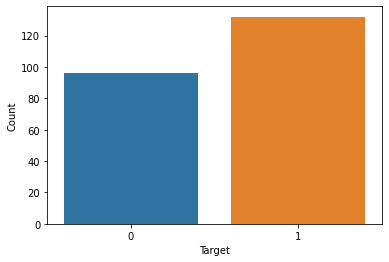

In [16]:
# Visualization to check if the dataset is balanced or not
g = sns.countplot(x='target', data=df_new)
plt.xlabel('Target')
plt.ylabel('Count')

**Exploring the data with Auto EDA tools**

In [ ]:
import seaborn as sns
import pandas as pd


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ Heart Disease Prediction/heart.csv')

In [ ]:
!pip install dtale

In [ ]:
import dtale
dtale.show(df)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ Heart Disease Prediction/heart.csv')

In [ ]:
from pandas_visual_analysis import VisualAnalysis

In [ ]:
VisualAnalysis(df)

In [ ]:
!pip install dataprep

In [ ]:
import pandas as pd
from dataprep.eda import create_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ Heart Disease Prediction/heart.csv')

In [ ]:
create_report(df)

In [ ]:
!pip install klib

In [ ]:
import klib

In [ ]:
klib.cat_plot(df)

In [ ]:
klib.corr_mat(df)

In [ ]:
klib.corr_plot(df)

In [ ]:
klib.dist_plot(df)

# **Data Preprocessing**

## Handling categorical features

After exploring the dataset, I observed that converting the categorical variables into dummy variables using 'get_dummies()'. Though we don't have any strings in our dataset it is necessary to convert ('sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal') these features.

*Example: Consider the 'sex' column, it is a binary feature which has 0's and 1's as its values. Keeping it as it is would lead the algorithm to think 0 is lower value and 1 is a higher value, which should not be the case since the gender cannot be ordinal feature.*

In [17]:
dataset = pd.get_dummies(df_new, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

## Feature Scaling

In [19]:
dataset.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'thal_1', 'thal_2', 'thal_3'],
      dtype='object')

**Standardizing the Data**

In [20]:
from sklearn.preprocessing import StandardScaler
standScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
dataset[columns_to_scale] = standScaler.fit_transform(dataset[columns_to_scale])

In [21]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
1,-1.773674,0.086772,0.172434,1.600895,2.472003,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,-1.339305,0.086772,-0.867525,0.932553,0.439382,1,1,0,0,1,...,0,0,0,1,1,0,0,0,1,0
3,0.289579,-0.566164,-0.144075,1.199890,-0.141366,1,0,1,0,1,...,0,0,0,1,1,0,0,0,1,0
4,0.398172,-0.566164,2.523646,0.531547,-0.334949,1,1,0,1,0,...,1,0,0,1,1,0,0,0,1,0
5,0.398172,0.739707,-1.138819,-0.136795,-0.528532,1,0,1,1,0,...,0,0,1,0,1,0,0,1,0,0


In [22]:
# Splitting the dataset into dependent and independent features
X = dataset.drop('target', axis=1)
Y = dataset['target']

In [23]:
# Splitting the dataset into Train and Test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=20, stratify = Y)

In [24]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(171, 26)
(171,)
(57, 26)
(57,)


# **Model Building**

I will be experimenting with 3 algorithms:
1. KNeighbors Classifier
2. Decision Tree Classifier
3. Random Forest Classifier

## KNeighbors Classifier Model

In [25]:
# Importing essential libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score

In [26]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print(y_pred_knn)

[1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 0
 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1]


In [27]:
knn_score = classification_report(y_test,y_pred_knn)
print(knn_score)

              precision    recall  f1-score   support

           0       0.73      0.67      0.70        24
           1       0.77      0.82      0.79        33

    accuracy                           0.75        57
   macro avg       0.75      0.74      0.74        57
weighted avg       0.75      0.75      0.75        57



In [28]:
# Finding the best accuracy for knn algorithm using cross_val_score 
knn_test_accuracy =[]
for i in range(1, 21):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_knn = knn.predict(x_test)
    knn_test_accuracy.append(accuracy_score(y_pred_knn,y_test).round(4))
print(knn_test_accuracy)

[0.6491, 0.6842, 0.7544, 0.7193, 0.7544, 0.7193, 0.7018, 0.6842, 0.7193, 0.6491, 0.7018, 0.7018, 0.6842, 0.7018, 0.7193, 0.7368, 0.7368, 0.7368, 0.7544, 0.7193]


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

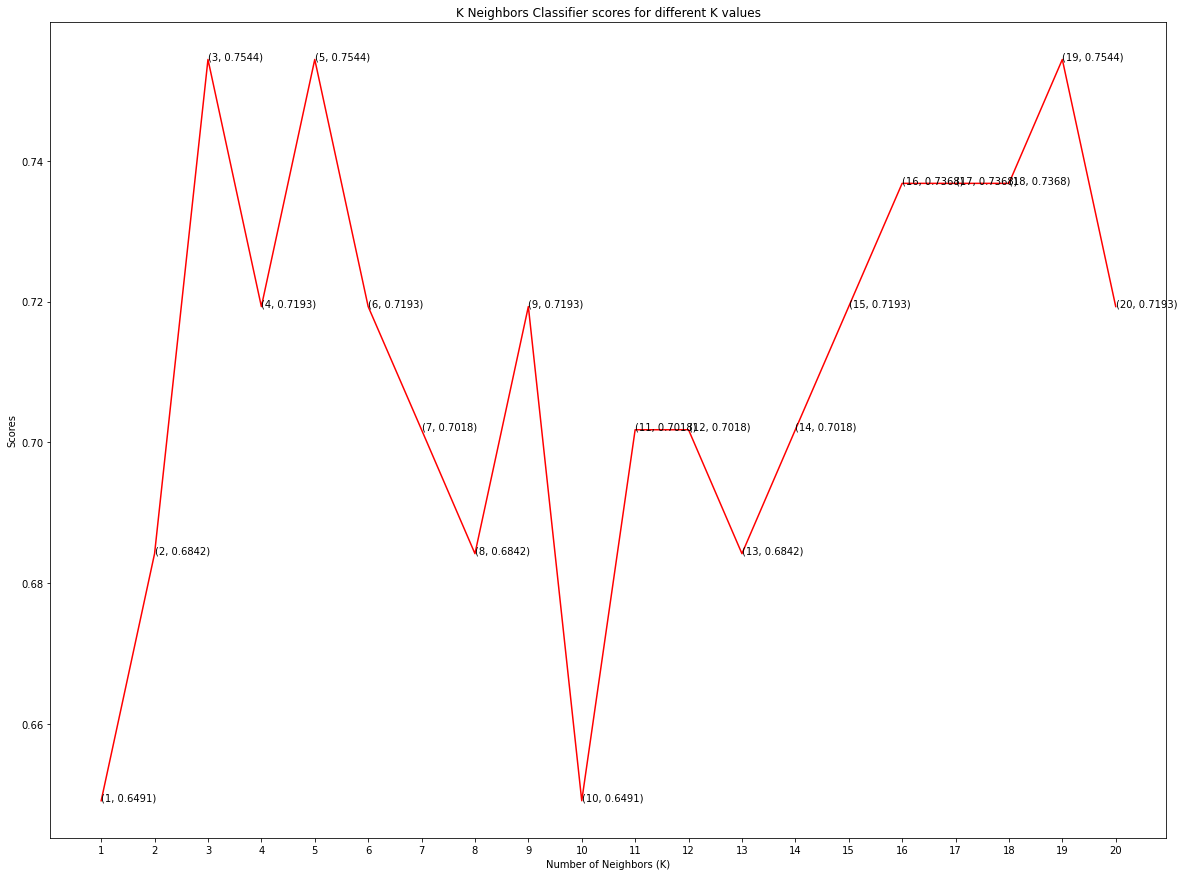

In [29]:
# Plotting the results of knn_scores
plt.figure(figsize=(20,15))
plt.plot([k for k in range(1, 21)], knn_test_accuracy, color = 'red')
for i in range(1,21):
    plt.text(i, knn_test_accuracy[i-1], (i, knn_test_accuracy[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [40]:
# Training the knn classifier model with k value as 3
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
cvs_scores = cross_val_score(knn, x_train, y_train, cv=10)
y_pred_knn_3 = knn.predict(x_test)
print("KNeighbours Classifier Accuracy with K=3 is: {}%".format(round(cvs_scores.mean(), 4)*100))

KNeighbours Classifier Accuracy with K=3 is: 81.86%


In [41]:
from sklearn.metrics import classification_report
KNN_report = classification_report(y_pred_knn_3,y_test)
print(KNN_report)

              precision    recall  f1-score   support

           0       0.67      0.73      0.70        22
           1       0.82      0.77      0.79        35

    accuracy                           0.75        57
   macro avg       0.74      0.75      0.74        57
weighted avg       0.76      0.75      0.76        57



## Decision Tree Classifier

In [42]:
# Importing essential libraries
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt= dt.predict(x_test)

In [43]:
dt_report = classification_report(y_pred_dt,y_test)
print(dt_report)

              precision    recall  f1-score   support

           0       0.71      0.65      0.68        26
           1       0.73      0.77      0.75        31

    accuracy                           0.72        57
   macro avg       0.72      0.71      0.72        57
weighted avg       0.72      0.72      0.72        57



In [44]:
# Finding the best accuracy for decision tree algorithm using cross_val_score 
dt_test_accuracy =[]
for i in range(1, 11):
    dt_para = DecisionTreeClassifier(max_depth=i)
    dt_para.fit(x_train,y_train)
    y_pred_dt_para = dt_para.predict(x_test)
    dt_test_accuracy.append(accuracy_score(y_pred_dt_para,y_test).round(4))
print(dt_test_accuracy)

[0.8246, 0.807, 0.6842, 0.7368, 0.7193, 0.7193, 0.7368, 0.7193, 0.6842, 0.7018]


Text(0.5, 1.0, 'Decision Tree Classifier scores for different depth values')

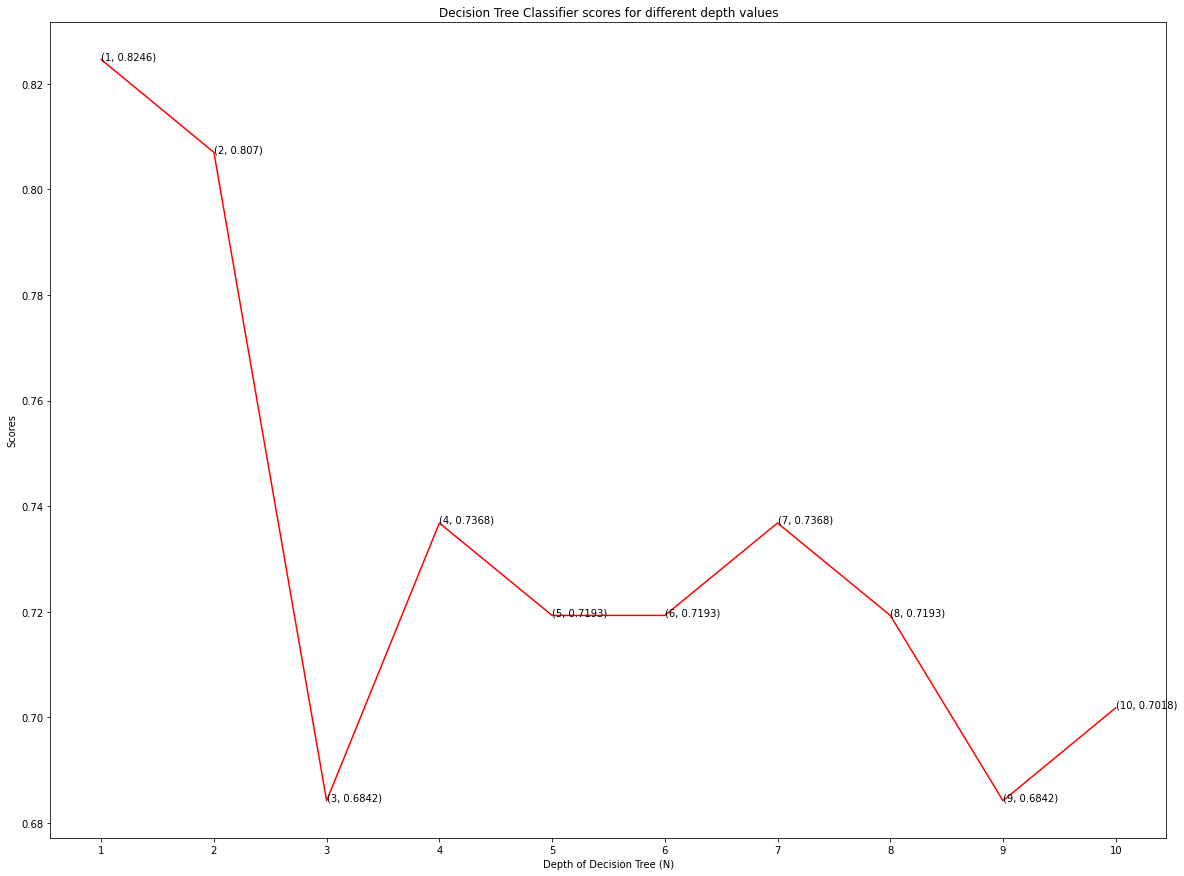

In [45]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], dt_test_accuracy, color = 'red')
for i in range(1,11):
    plt.text(i, dt_test_accuracy[i-1], (i, dt_test_accuracy[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')

In [36]:
# Training the decision tree classifier model with max_depth value as 1
from sklearn.tree import DecisionTreeClassifier
dt_3 = DecisionTreeClassifier(max_depth=1)
dt.fit(x_train,y_train)
y_pred_dt_3= dt.predict(x_test)
print("Decision Tree Classifier Accuracy with max_depth=3 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Decision Tree Classifier Accuracy with max_depth=3 is: 80.72%


## Random Forest Classifier

In [46]:
# Importing essential libraries
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Finding the best accuracy for random forest algorithm using cross_val_score 
forest_scores = []
for i in range(10, 101, 10):
  forest_classifier = RandomForestClassifier(n_estimators=i)
  cvs_scores = cross_val_score(forest_classifier, x_train, y_train, cv=5)
  forest_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

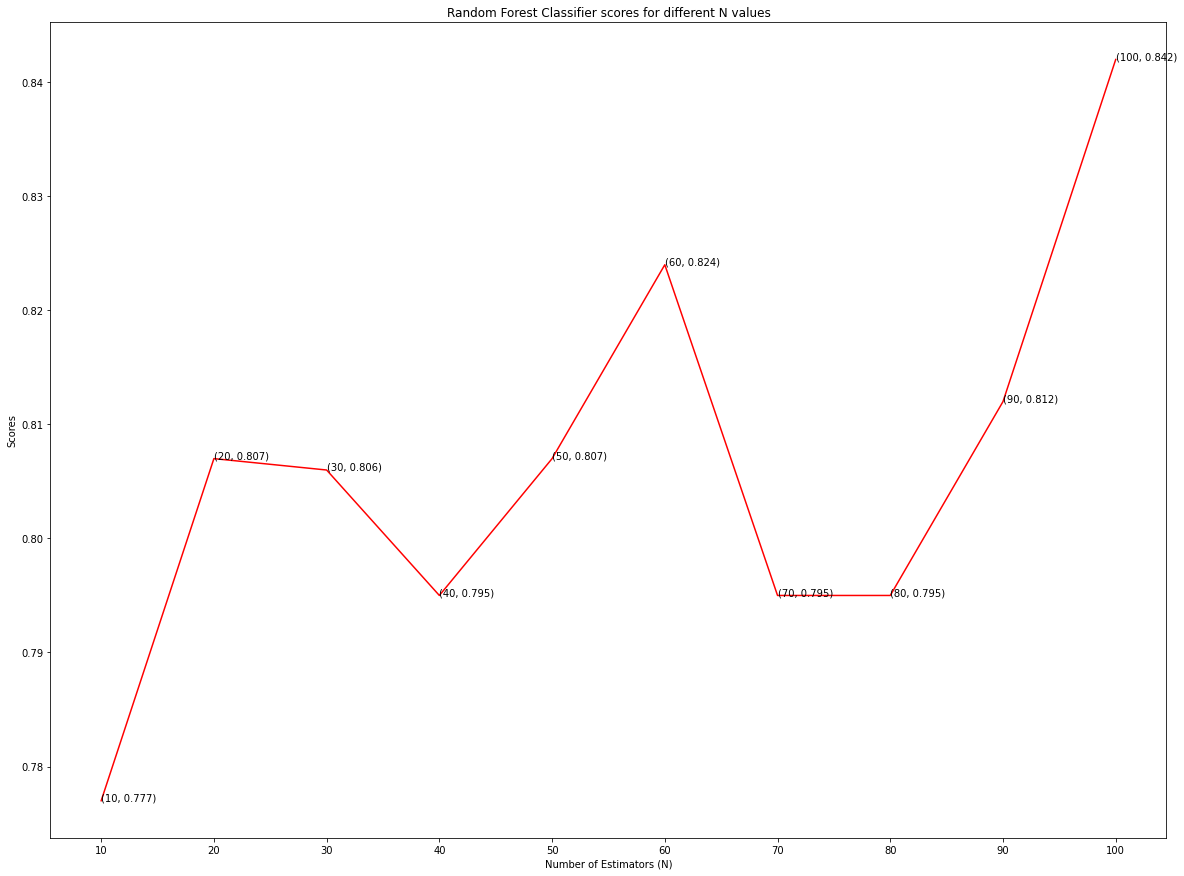

In [48]:
# Plotting the results of forest_scores
plt.figure(figsize=(20,15))
plt.plot([n for n in range(10, 101, 10)], forest_scores, color = 'red')
for i in range(1,11):
    plt.text(i*10, forest_scores[i-1], (i*10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')

In [49]:
# Training the random forest classifier model with n value as 100
forest_classifier = RandomForestClassifier(n_estimators=100)
cvs_scores = cross_val_score(forest_classifier, x_train, y_train, cv=5)
print("Random Forest Classifier Accuracy with n_estimators=100 is: {}%".format(round(cvs_scores.mean(), 4)*100))

Random Forest Classifier Accuracy with n_estimators=100 is: 81.24%


** Feature Selection**

### Method-1
### SelectKBest and Chisquare

In [52]:
X = df_new.drop('target', axis=1)
Y = df_new['target']

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

Select_KBest_rank_features=SelectKBest(score_func=chi2,k=5)
KBest_features=Select_KBest_rank_features.fit(X,Y)

df_Kscores=pd.DataFrame(KBest_features.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(X.columns)

kbest_features_rank=pd.concat([dfcolumns,df_Kscores],axis=1)

kbest_features_rank.columns=['Features','K_score']
kbest_features_rank

kbest_features_rank.nlargest(6,'K_score')

,Features,K_score
7,thalach,132.746263
9,oldpeak,49.620172
11,ca,46.381255
2,cp,34.506554
8,exang,26.790404
0,age,16.776474


**Method-2** 
####ExtraTreesClassifier

[0.07549316 0.06786037 0.10209517 0.06435442 0.06310402 0.
 0.0327293  0.08236151 0.0861348  0.09363089 0.05211247 0.12326002
 0.15686387]


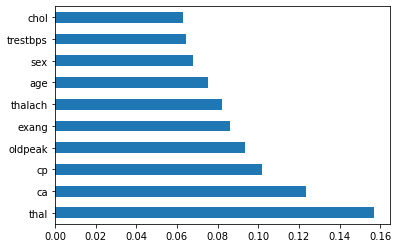

,Features,Score
12,thal,0.156864
11,ca,0.123260
2,cp,0.102095
9,oldpeak,0.093631
8,exang,0.086135
7,thalach,0.082362


In [53]:
from sklearn.ensemble import ExtraTreesClassifier
ET_model=ExtraTreesClassifier()
ET_model.fit(X,Y)

print(ET_model.feature_importances_)

import matplotlib.pyplot as plt
ET_ranked_features=pd.Series(ET_model.feature_importances_,index=X.columns)
ET_ranked_features.nlargest(10).plot(kind='barh')
plt.show()


df_ET_rank =pd.DataFrame(ET_model.feature_importances_)

dfcolumns=pd.DataFrame(X.columns)

ET_features_rank=pd.concat([dfcolumns,df_ET_rank],axis=1)

ET_features_rank.columns=['Features','Score']
ET_features_rank
ET_features_rank.nlargest(6,'Score')

**Method-3**
#####mutual_info_classif

thal       0.192449
cp         0.105920
thalach    0.102327
ca         0.100994
exang      0.095982
oldpeak    0.095785
dtype: float64


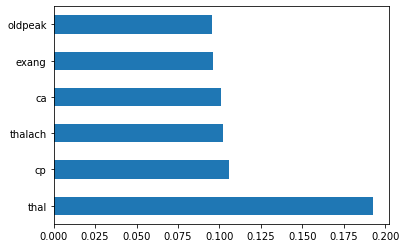

In [55]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(X,Y)

mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)

print(mutual_data.nlargest(6))

mutual_data.nlargest(6).plot(kind='barh')
plt.show()


**Method-4**
**Remove The correlated**

In [57]:
threshold=0.3

# find and remove correlated features
def correlation(df_new, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df_new.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr



In [58]:
correlation(df_new.iloc[:,:-1],threshold)

{'ca', 'exang', 'oldpeak', 'slope', 'thalach'}

In [60]:
# Selecting correlated features using Heatmap

# Get correlation of all the features of the dataset
corr_matrix = df_new.corr()
top_corr_features = corr_matrix.index


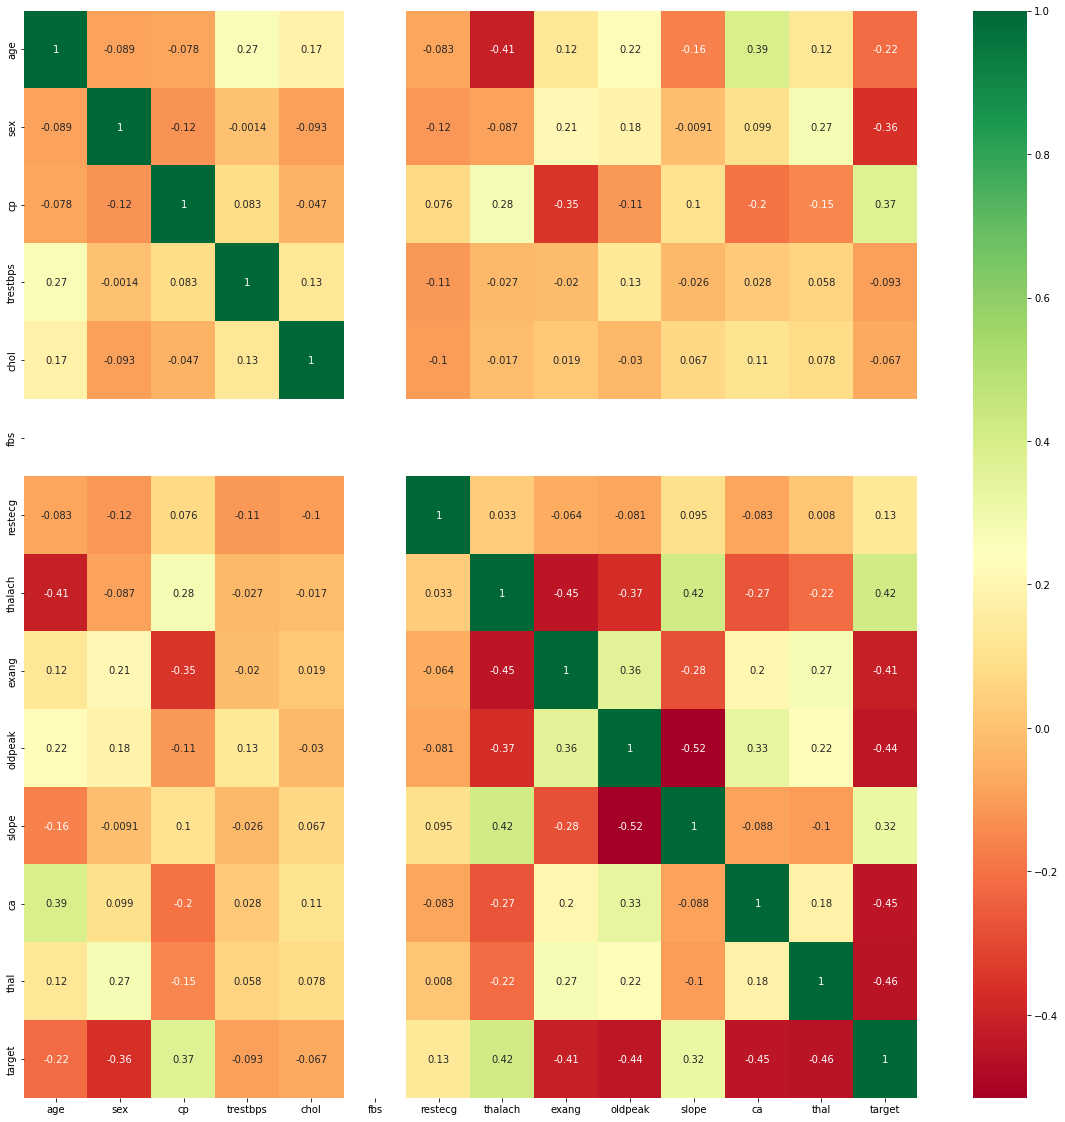

In [61]:
# Plotting the heatmap
plt.figure(figsize=(20,20))
sns.heatmap(data=df_new[top_corr_features].corr(), annot=True, cmap='RdYlGn')

After applying feature selection, Came to know that below feature are most important.

Thalach, ca, thal, cp, oldpeak,exang

In [62]:
df_new.shape

(228, 14)

In [ ]:
df_new.info()

In [64]:
X = df_new[['thalach', 'ca', 'thal', 'cp', 'oldpeak','exang']]
Y = df_new['target']

In [65]:
X.head()

,thalach,ca,thal,cp,oldpeak,exang
1,187,0,2,2,3.5,0
2,172,0,2,1,1.4,0
3,178,0,2,1,0.8,0
4,163,0,2,0,0.6,1
5,148,0,1,0,0.4,0


In [66]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_scale = scale.fit_transform(X)

In [67]:
# Splitting the dataset into Train and Test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_scale,Y, test_size=0.25, random_state=20, stratify = Y)

In [68]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(171, 6)
(171,)
(57, 6)
(57,)


In [69]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,accuracy_score

In [70]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [71]:
knn_score = classification_report(y_test,y_pred_knn)
print(knn_score)

              precision    recall  f1-score   support

           0       0.82      0.58      0.68        24
           1       0.75      0.91      0.82        33

    accuracy                           0.77        57
   macro avg       0.79      0.75      0.75        57
weighted avg       0.78      0.77      0.76        57



In [72]:
# Finding the best accuracy for knn algorithm using cross_val_score 
knn_test_accuracy =[]
for i in range(1, 21):
    knn =KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred_knn = knn.predict(x_test)
    knn_test_accuracy.append(accuracy_score(y_pred_knn,y_test).round(4))
print(knn_test_accuracy)

[0.7544, 0.6842, 0.7193, 0.7719, 0.7719, 0.7895, 0.7895, 0.7719, 0.7719, 0.8246, 0.8246, 0.807, 0.7895, 0.7719, 0.7719, 0.7895, 0.7895, 0.807, 0.7719, 0.7895]


Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

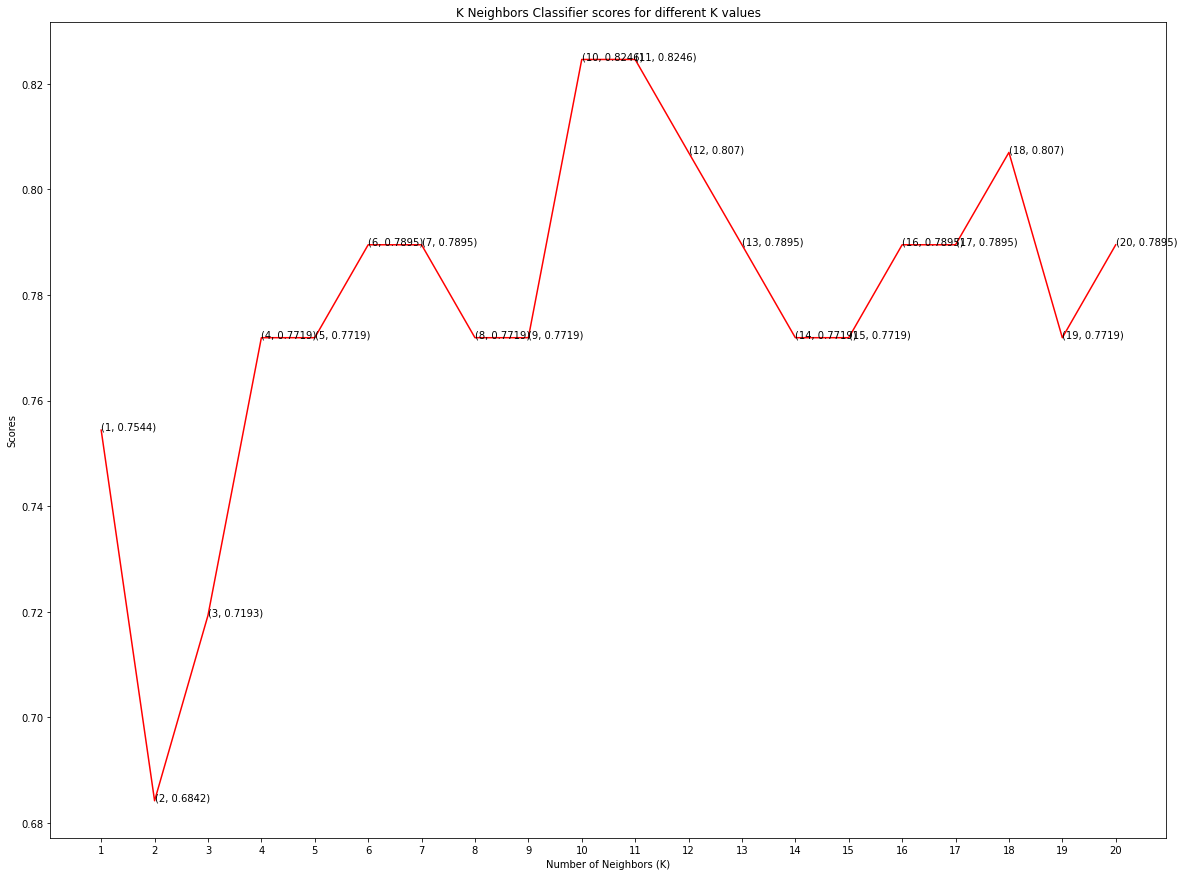

In [73]:
# Plotting the results of knn_scores
plt.figure(figsize=(20,15))
plt.plot([k for k in range(1, 21)], knn_test_accuracy, color = 'red')
for i in range(1,21):
    plt.text(i, knn_test_accuracy[i-1], (i, knn_test_accuracy[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the graph, We can confirm that at k=11, score is 

82.46

In [74]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [75]:
knn_score_11 = classification_report(y_test,y_pred_knn)
print(knn_score_11)

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        24
           1       0.81      0.91      0.86        33

    accuracy                           0.82        57
   macro avg       0.83      0.81      0.81        57
weighted avg       0.83      0.82      0.82        57



In [76]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred_dt= dt.predict(x_test)

In [77]:
dt_score = classification_report(y_test,y_pred_dt)
print(dt_score)

              precision    recall  f1-score   support

           0       0.58      0.62      0.60        24
           1       0.71      0.67      0.69        33

    accuracy                           0.65        57
   macro avg       0.64      0.65      0.64        57
weighted avg       0.65      0.65      0.65        57



In [78]:
# Finding the best accuracy for decision tree algorithm using cross_val_score 
dt_test_accuracy =[]
for i in range(1, 11):
    dt_para = DecisionTreeClassifier(max_depth=i)
    dt_para.fit(x_train,y_train)
    y_pred_dt_para = dt_para.predict(x_test)
    dt_test_accuracy.append(accuracy_score(y_pred_dt_para,y_test).round(4))
print(dt_test_accuracy)

[0.8246, 0.7018, 0.7544, 0.7193, 0.6491, 0.7018, 0.6667, 0.6491, 0.6316, 0.614]


Text(0.5, 1.0, 'Decision Tree Classifier scores for different depth values')

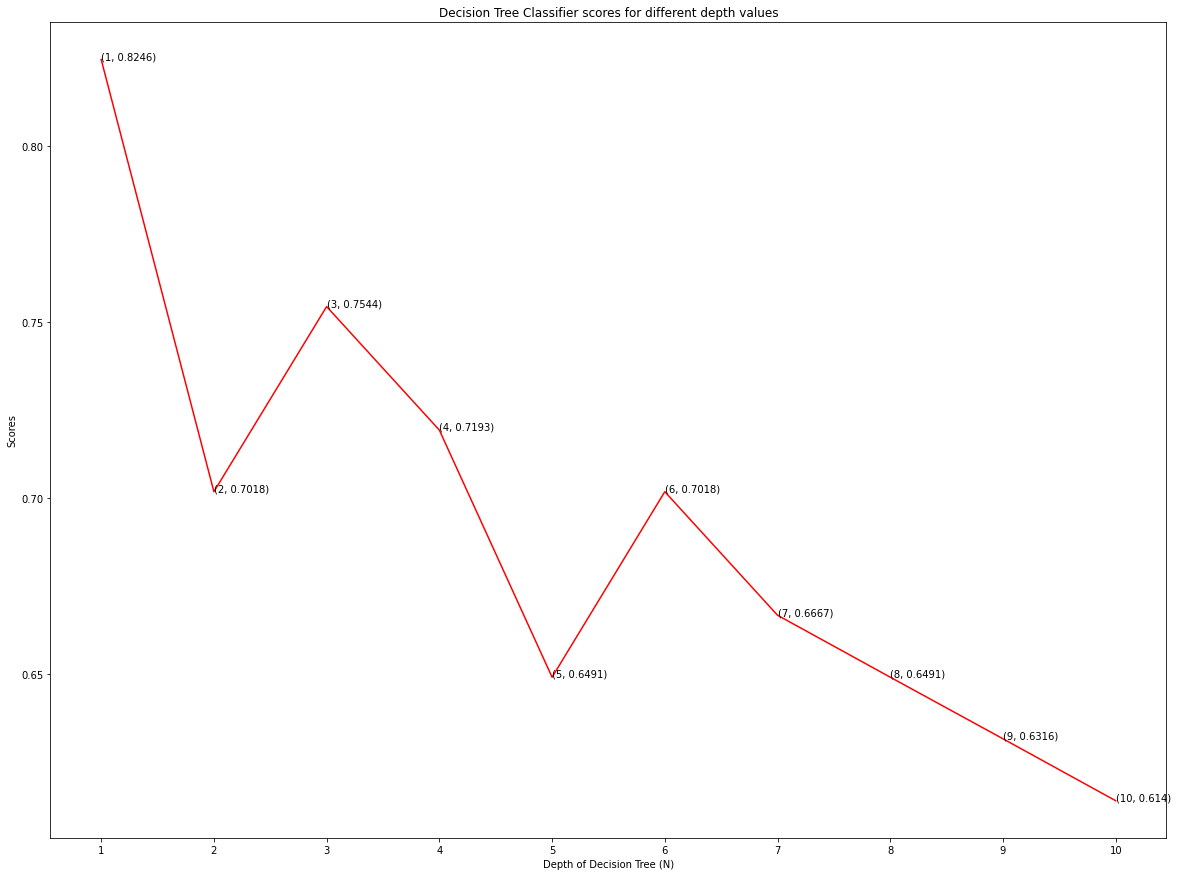

In [79]:
# Plotting the results of decision_scores
plt.figure(figsize=(20,15))
plt.plot([i for i in range(1, 11)], dt_test_accuracy, color = 'red')
for i in range(1,11):
    plt.text(i, dt_test_accuracy[i-1], (i, dt_test_accuracy[i-1]))
plt.xticks([i for i in range(1, 11)])
plt.xlabel('Depth of Decision Tree (N)')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different depth values')

at max_depth =1, score is 82.16

In [81]:
from sklearn.tree import DecisionTreeClassifier
dt_1 = DecisionTreeClassifier(max_depth=1)
dt_1.fit(x_train,y_train)
y_pred_dt_1= dt.predict(x_test)

In [82]:
dt_score_1 = classification_report(y_test,y_pred_dt_1)
print(dt_score_1)

              precision    recall  f1-score   support

           0       0.58      0.62      0.60        24
           1       0.71      0.67      0.69        33

    accuracy                           0.65        57
   macro avg       0.64      0.65      0.64        57
weighted avg       0.65      0.65      0.65        57



In [83]:
# Importing essential libraries
from sklearn.ensemble import RandomForestClassifier

In [84]:
# Finding the best accuracy for random forest algorithm using cross_val_score 
forest_scores = []
for i in range(10, 101, 10):
  forest_classifier = RandomForestClassifier(n_estimators=i)
  cvs_scores = cross_val_score(forest_classifier, x_train, y_train, cv=5)
  forest_scores.append(round(cvs_scores.mean(),3))

Text(0.5, 1.0, 'Random Forest Classifier scores for different N values')

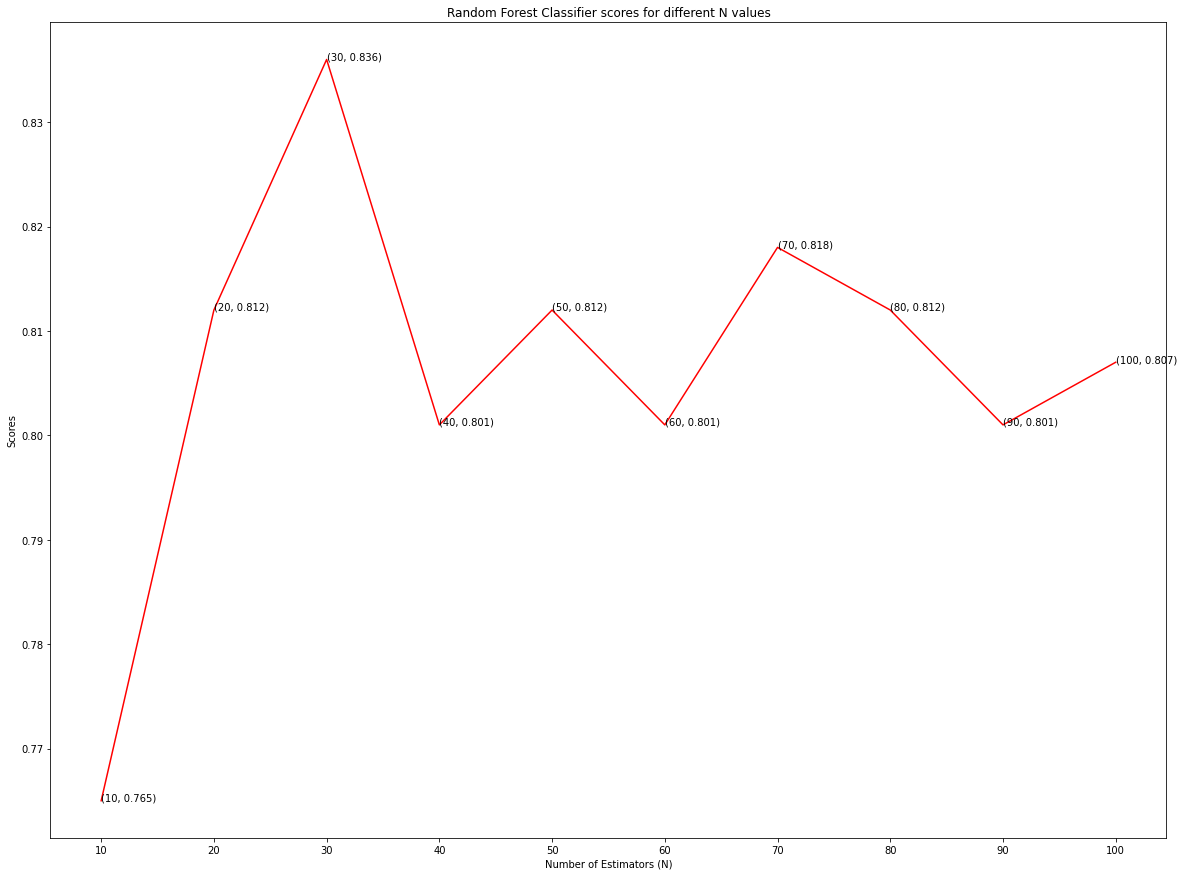

In [85]:
# Plotting the results of forest_scores
plt.figure(figsize=(20,15))
plt.plot([n for n in range(10, 101, 10)], forest_scores, color = 'red')
for i in range(1,11):
    plt.text(i*10, forest_scores[i-1], (i*10, forest_scores[i-1]))
plt.xticks([i for i in range(10, 101, 10)])
plt.xlabel('Number of Estimators (N)')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different N values')

**ANN**

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [91]:
model= Sequential()
model.add(Dense(6,activation='relu',name='input'))
model.add(Dense(9,activation='relu',name='hidden'))
model.add(Dense(1,name='sigmoid'))

In [93]:
model.compile(optimizer= "adam", loss="binary_crossentropy",metrics=["accuracy"])


In [95]:
model.fit(x =x_train, y= y_train, validation_data=(x_test,y_test), batch_size=10, epochs=5, verbose=0)

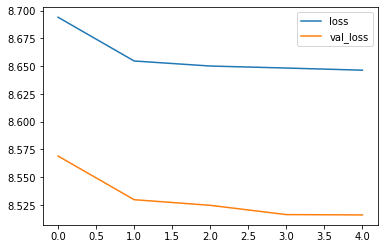

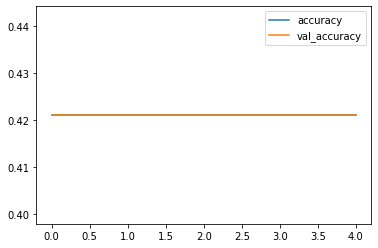

In [96]:
import pandas as pd
losses = pd.DataFrame(model.history.history)
losses
losses[['loss','val_loss']].plot()
losses[['accuracy','val_accuracy']].plot()